In [1]:
import numpy as np
import os
import sys

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.fourier import FourierBasis

sys.path.append(os.path.abspath("../../J"))
from J.jmatrix import JMatrix

### Settings

In [2]:
t_values = np.linspace(0, 1, 1000)

##### B-splines

In [3]:
degree_bspline = 0
num_basis_bspline = 4
bspline_0 = BSplineBasis(degree_bspline, num_basis_bspline)

degree_bspline = 1
num_basis_bspline = 5
bspline_1 = BSplineBasis(degree_bspline, num_basis_bspline)

degree_bspline = 3
num_basis_bspline = 8
bspline_3 = BSplineBasis(degree_bspline, num_basis_bspline)

##### Polynomials

In [4]:
degree_poly = 2
poly_1 = PolynomialBasis(degree_poly)

degree_poly = 3
poly_2 = PolynomialBasis(degree_poly)

##### Fourier

In [5]:
num_basis_fourier = 3
fourier_3 = FourierBasis(num_basis_fourier)

##### Consolidation of Bases

In [6]:
bases = [bspline_0, bspline_1, bspline_3,
         poly_1, poly_2,
         fourier_3]

### J-Matrix

In [7]:
basis_pairs_0 = [(bspline_0, poly_1)]
j_0 = JMatrix(basis_pairs_0)
J_0 = j_0.compute()
print(J_0)

[[0.25    0.03125]
 [0.25    0.09375]
 [0.25    0.15625]
 [0.25    0.21875]]


In [8]:
basis_pairs_1 = [(bspline_0, poly_1),    # 4x2
                 (bspline_1, poly_2),    # 5x3
                 (bspline_3, fourier_3)] # 8x3
j_1 = JMatrix(basis_pairs_1)
J_1 = np.round(j_1.compute(),3)
print(J_1)

[[ 0.25   0.031  0.     0.     0.     0.     0.     0.   ]
 [ 0.25   0.094  0.     0.     0.     0.     0.     0.   ]
 [ 0.25   0.156  0.     0.     0.     0.     0.     0.   ]
 [ 0.25   0.219  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.125  0.01   0.001  0.     0.     0.   ]
 [ 0.     0.     0.25   0.062  0.018  0.     0.     0.   ]
 [ 0.     0.     0.25   0.125  0.065  0.     0.     0.   ]
 [ 0.     0.     0.25   0.188  0.143  0.     0.     0.   ]
 [ 0.     0.     0.125  0.115  0.105  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.05   0.012  0.047]
 [ 0.     0.     0.     0.     0.     0.1    0.062  0.067]
 [ 0.     0.     0.     0.     0.     0.15   0.125  0.009]
 [ 0.     0.     0.     0.     0.     0.2    0.09  -0.124]
 [ 0.     0.     0.     0.     0.     0.2   -0.09  -0.124]
 [ 0.     0.     0.     0.     0.     0.15  -0.125  0.009]
 [ 0.     0.     0.     0.     0.     0.1   -0.062  0.067]
 [ 0.     0.     0.     0.     0.     0.05  -0.012  0.04

### Plot the whole basis

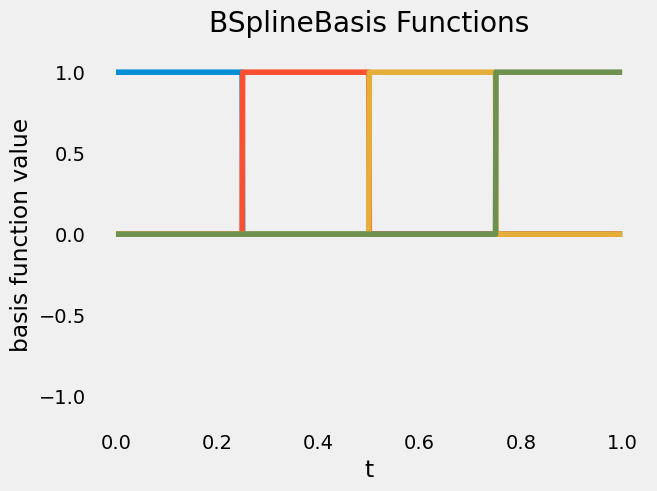

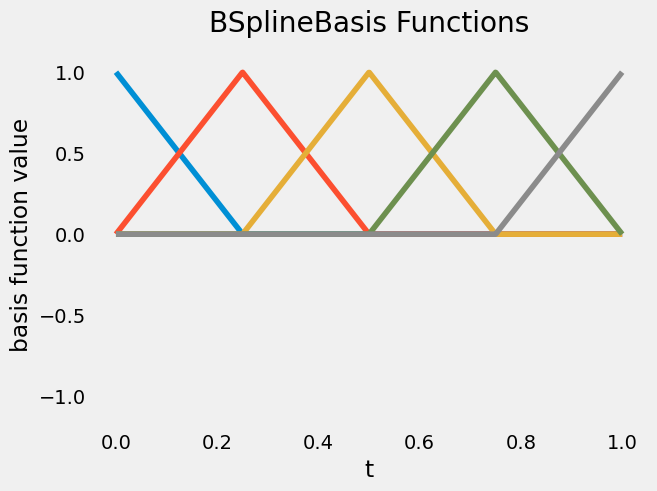

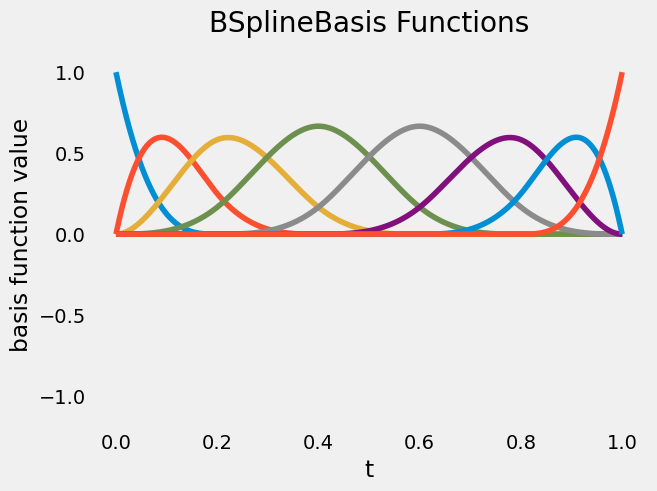

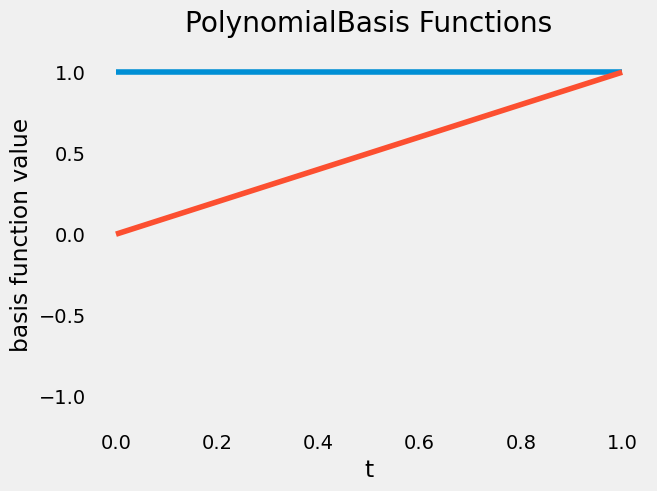

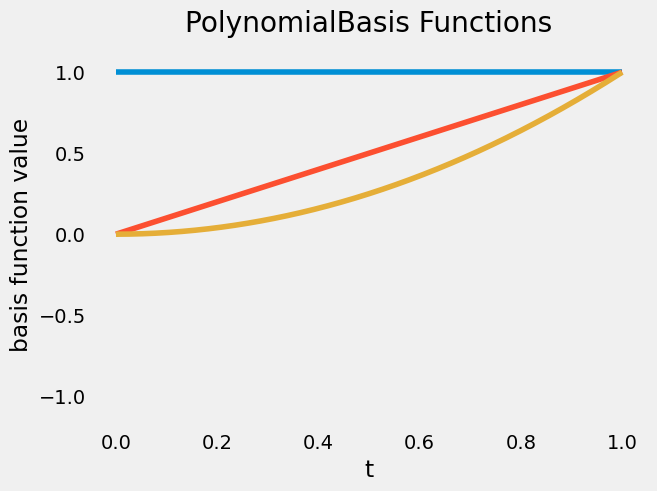

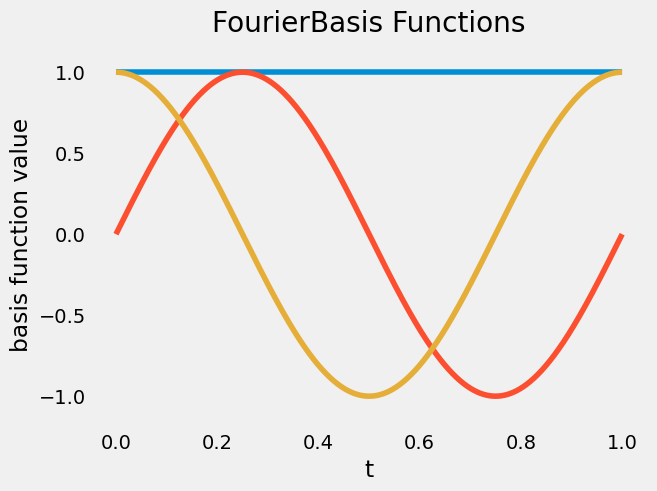

In [9]:
for basis in bases:
    basis.plot_basis_functions(t_values)

### Plot experimental run

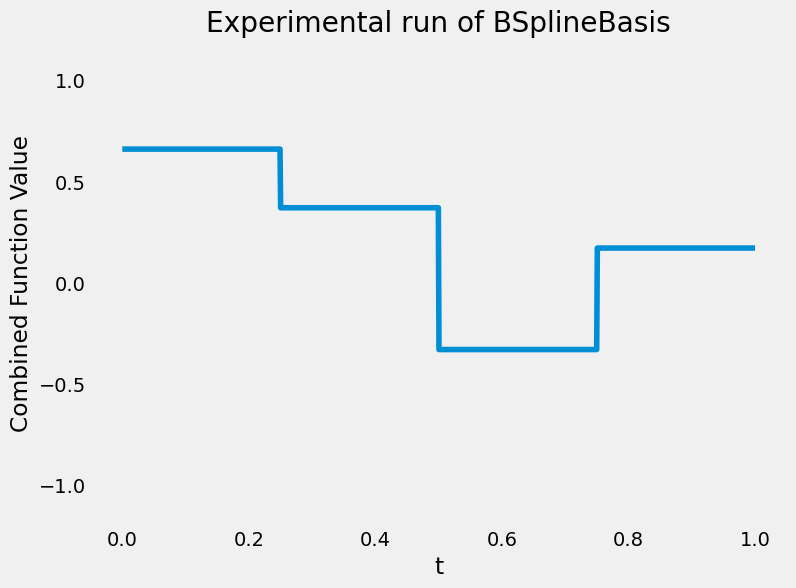

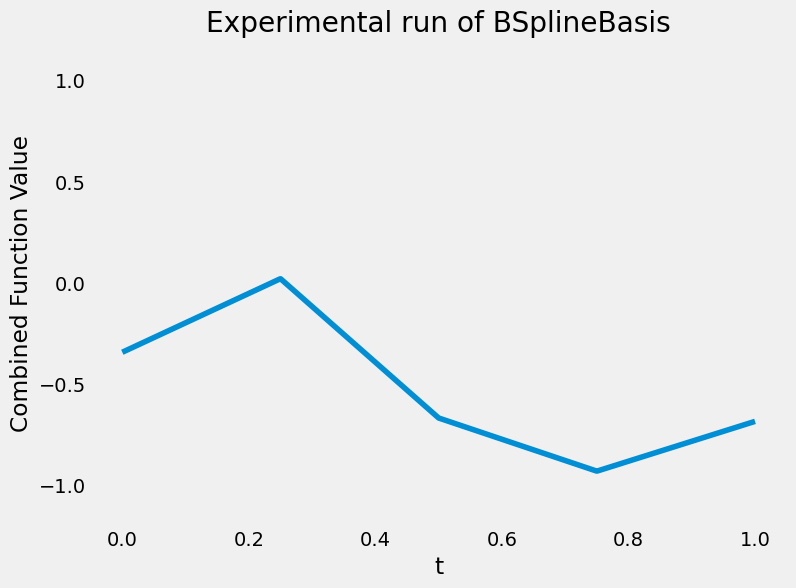

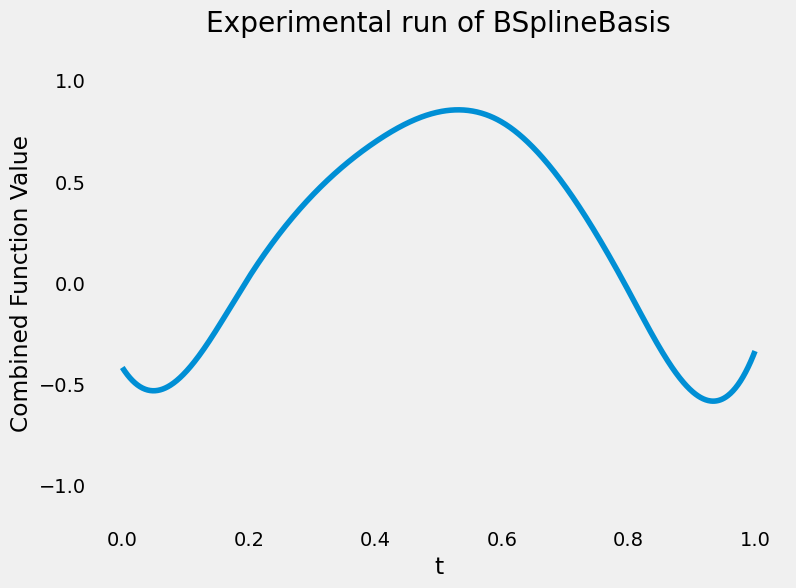

In [10]:
for basis in bases[0:3]:
    coefficients = np.random.uniform(-1, 1, basis.num_basis_functions)
    basis.plot_experimental_run(t_values, coefficients)